TESIS RADEN
ANALISIS HEADLINE DAN TOPIK BERITA TENTANG KONFLIK PALESTINA-ISRAEL PADA TAHUN 2024 MENGGUNAKAN ALGORITMA LATENT DIRICHLET ALLOCATION (LDA) DAN BERTOPIC


In [1]:
!python --version

Python 3.11.11


In [2]:
# Instal ulang pandas ke versi kompatibel
!pip uninstall pandas -y
!pip install pandas==1.3.3
!pip install Sastrawi bertopic numpy scikit-learn wordcloud matplotlib openpyxl pyLDAvis==3.4.0

Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 12.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install --upgrade ipykernel ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 600.5/600.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.7.1
    Uninstalling traitlets-5.7.1:
      Successfully uninstalled traitlets-5.7.1
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.17.1
    Uninstalling ipykernel-6.17.1:
      Successfully uninstalled ipykernel-6.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 

In [4]:
!pip install --upgrade pandas

In [ ]:
pip install --upgrade --force-reinstall numpy pandas matplotlib scikit-learn wordcloud bertopic openpyxl pyLDAvis==3.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached bertopic-0.17.0-py3-none-any.whl.metadata (23 kB)
  Using cached pyLDAvis-3.4.0-py3-none-any.whl.metadata (4.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.8 MB/s eta 0:00:00
  Using cached funcy-2.0-py2.py3-none-any.whl.metadata (5.9 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached setuptools-78.1.0-py3-none-any.whl.metadata (6.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.5 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from bertopic import BERTopic
from wordcloud import WordCloud
import pyLDAvis
from pyLDAvis import sklearn as sklearn_lda
from google.colab import files
import openpyxl
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from openpyxl import Workbook
from gensim.utils import simple_preprocess
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# Meminta pengguna untuk mengunggah file CSV
uploaded = files.upload()

# Mendapatkan nama file yang diunggah
for file_name in uploaded.keys():
    print(f"File '{file_name}' berhasil diunggah!")

    # Membaca file CSV ke dalam DataFrame
    data = pd.read_csv(file_name)
    print("Lima baris pertama dataset:")
    print(data.head())

# Periksa kolom-kolom yang ada
print("Kolom dalam dataset:")
print(data.columns)

# Gunakan kolom 'Topik Berita' sebagai label
y_true = data['Topik Berita']  # Ganti 'Topik Berita' sebagai label

Saving dataset.csv to dataset.csv
File 'dataset.csv' berhasil diunggah!
Lima baris pertama dataset:
                                            Headline Topik Berita  \
0       IDF Mengeluarkan Resolusi Konflik Bersenjata      Politik   
1  Palestina Memulai Operasi Militer Konflik Bers...      Ekonomi   
2             AS Mengadakan Rapat Konflik Bersenjata      Ekonomi   
3           Hamas Mengadakan Rapat Pendudukan Israel   Lingkungan   
4      PBB Memulai Operasi Militer Pendudukan Israel   Lingkungan   

   Tahun Berita                                 Link Berita  
0          2022        https://www.kompas.com/global/576961  
1          2024  https://www.detik.com/internasional/882425  
2          2023      https://www.liputan6.com/global/363557  
3          2022      https://www.cnn.com/middle-east/640685  
4          2023      https://www.liputan6.com/global/945433  
Kolom dalam dataset:
Index(['Headline', 'Topik Berita', 'Tahun Berita', 'Link Berita'], dtype='object')


In [ ]:
# Preprocessing teks menggunakan Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def preprocess_text(text):
    # Ubah ke huruf kecil
    text = text.lower()
    # Hapus angka dan karakter non-alphanumerik
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    # Stemming (akar kata)
    text = stemmer.stem(text)
    return text

In [ ]:
# Terapkan preprocessing
data['Processed_Headline'] = data['Headline'].apply(preprocess_text)

In [ ]:
# ------ LDA Analysis ------
# Vektorisasi teks
vectorizer = CountVectorizer(max_df=0.9, min_df=2)
dtm = vectorizer.fit_transform(data['Processed_Headline'])

In [ ]:
# Model LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42, max_iter=10)
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
# Menampilkan topik-topik yang dihasilkan
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        words = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        topics.append(words)
        print(f"Topik {topic_idx+1}: {words}")
    return topics

no_top_words = 10
topics_lda = display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

Topik 1: blokade ada rapat idf hamas as pbb palestina dukung kutuk
Topik 2: menandatangani sepakat hak manusia asasi gaza idf hamas pbb as
Topik 3: israel duduk barat tepi dukung eropa uni kutuk kecam resolusi
Topik 4: serang senjata konflik roket keluar resolusi eropa uni idf palestina
Topik 5: operasi mulai militer damai palestina uni eropa pbb as gaza


In [ ]:
# Visualisasi interaktif LDA dengan pyLDAvis
pyLDAvis.enable_notebook()

# Menyiapkan data untuk visualisasi
lda_vis = pyLDAvis.prepare(
    topic_term_dists=lda.components_,
    doc_topic_dists=lda.transform(dtm),
    doc_lengths=np.array(dtm.sum(axis=1)).flatten(),
    vocab=vectorizer.get_feature_names_out(),
    term_frequency=np.array(dtm.sum(axis=0)).flatten()
)

# Tampilkan visualisasi interaktif
pyLDAvis.display(lda_vis)

# Simpan visualisasi ke dalam file HTML
pyLDAvis.save_html(lda_vis, "lda_visualization.html")
print("Visualisasi LDA disimpan sebagai 'lda_visualization.html'.")

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
# Fungsi untuk menghitung coherence score LDA
def compute_lda_coherence_score(model, dtm, vectorizer):
    # Menghitung cosine similarity antara topic-topik LDA
    doc_topic_dists = model.transform(dtm)
    cosine_similarities = cosine_similarity(doc_topic_dists.T)
    return cosine_similarities.mean()

# Fungsi untuk menghitung Topik Similarity
def compute_topic_similarity(lda_model, dtm, vectorizer):
    topic_dists = lda_model.components_
    similarity = cosine_similarity(topic_dists)
    return similarity.mean()

# Fungsi untuk menghitung Perplexity
def compute_perplexity(model, dtm):
    return model.perplexity(dtm)

# Menghitung nilai-nilai yang diperlukan
coherence_score = compute_lda_coherence_score(lda, dtm, vectorizer)
topic_similarity = compute_topic_similarity(lda, dtm, vectorizer)
perplexity = compute_perplexity(lda, dtm)

# Membuat DataFrame untuk menampilkan hasil
results_df = pd.DataFrame({
    'Coherence Score': [coherence_score],
    'Topic Similarity': [topic_similarity],
    'Perplexity': [perplexity]
})

# Menampilkan DataFrame
print(results_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



   Coherence Score  Topic Similarity  Perplexity
0         0.351382          0.273517   30.175047


In [ ]:
# ------ Analisis Statistik LDA ------
num_docs = dtm.shape[0]
num_vocab = dtm.shape[1]
num_words = dtm.sum()
log_likelihood = lda.score(dtm)
perplexity = lda.perplexity(dtm)

print(f"Jumlah Dokumen: {num_docs}")
print(f"Jumlah Kosa Kata: {num_vocab}")
print(f"Jumlah Kata: {num_words}")
print(f"Log-likelihood: {log_likelihood}")
print(f"Perplexity: {perplexity}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Jumlah Dokumen: 1000
Jumlah Kosa Kata: 33
Jumlah Kata: 4686
Log-likelihood: -15965.273783326906
Perplexity: 30.175046822426566


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



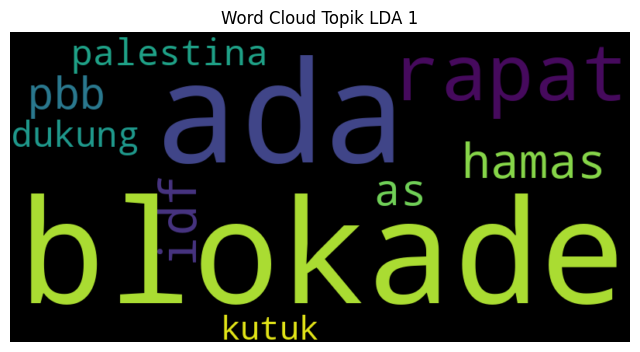

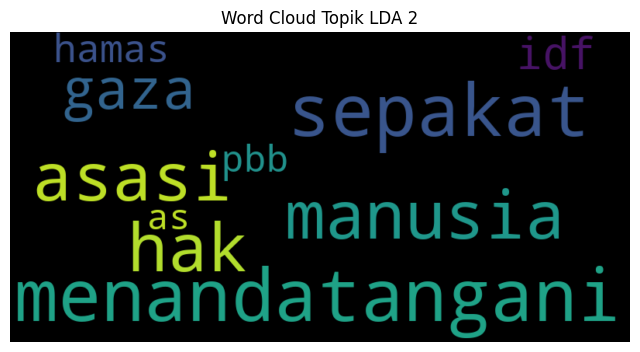

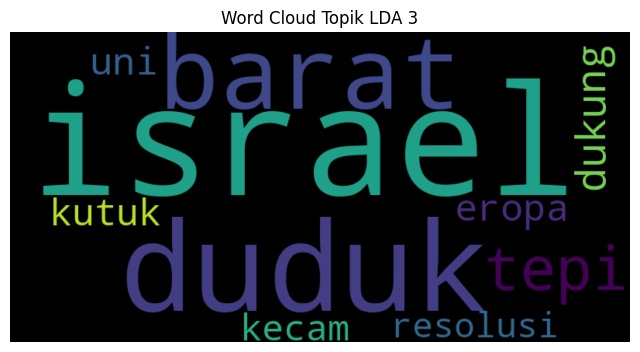

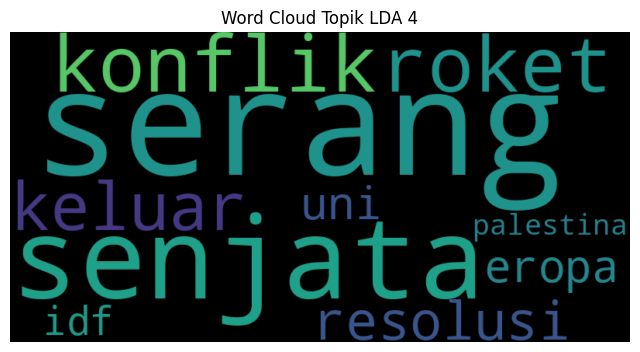

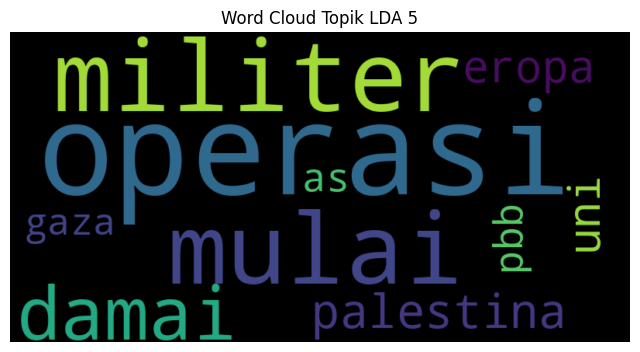

In [ ]:
# Word Cloud untuk LDA
for i, topic in enumerate(lda.components_):
    wc = WordCloud(width=800, height=400).fit_words({vectorizer.get_feature_names_out()[j]: topic[j] for j in topic.argsort()[:-no_top_words - 1:-1]})
    plt.figure(figsize=(8, 6))
    plt.title(f"Word Cloud Topik LDA {i+1}")
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
# ------ BERTopic Analysis ------
# Inisialisasi BERTopic
bertopic_model = BERTopic(language="indonesian")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Fit model ke headline yang telah diproses
topics, probs = bertopic_model.fit_transform(data['Processed_Headline'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Menampilkan hasil topik
print("Topik yang dihasilkan BERTopic:")
print(bertopic_model.get_topic_info())

Topik yang dihasilkan BERTopic:
    Topic  Count                                       Name  \
0      -1     90  -1_keluar_resolusi_sepakat_menandatangani   
1       0     41             0_senjata_konflik_dukung_hamas   
2       1     37                    1_roket_serang_as_kecam   
3       2     34                2_mulai_militer_idf_operasi   
4       3     34              3_gaza_resolusi_keluar_serang   
5       4     32                  4_manusia_hak_asasi_kecam   
6       5     31                  5_duduk_israel_dukung_pbb   
7       6     31               6_israel_operasi_damai_roket   
8       7     30                    7_blokade_as_pbb_dukung   
9       8     29                  8_damai_operasi_as_dukung   
10      9     27   9_sepakat_menandatangani_palestina_roket   
11     10     25         10_mulai_militer_palestina_operasi   
12     11     24         11_palestina_roket_serang_resolusi   
13     12     24                 12_asasi_manusia_hak_eropa   
14     13     22       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Visualisasi BERTopic
bertopic_model.visualize_topics().show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1846: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1846: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



In [ ]:
# Word Cloud untuk BERTopic
for topic in bertopic_model.get_topics().keys():
    if topic != -1:  # Skip outlier topic
        words = bertopic_model.get_topic(topic)
        wc = WordCloud(width=800, height=400).fit_words({word[0]: word[1] for word in words})
        plt.figure(figsize=(8, 6))
        plt.title(f"Word Cloud Topik BERTopic {topic}")
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Koherensi Topik:
Topik -1: Koherensi = 0.1200
Topik 0: Koherensi = 0.1000
Topik 1: Koherensi = 0.1000
Topik 2: Koherensi = 0.1400
Topik 3: Koherensi = 0.1000
Topik 4: Koherensi = 0.1000
Topik 5: Koherensi = 0.1200
Topik 6: Koherensi = 0.1000
Topik 7: Koherensi = 0.1000
Topik 8: Koherensi = 0.1000
Topik 9: Koherensi = 0.1400
Topik 10: Koherensi = 0.1400
Topik 11: Koherensi = 0.1000
Topik 12: Koherensi = 0.1111
Topik 13: Koherensi = 0.1200
Topik 14: Koherensi = 0.1200
Topik 15: Koherensi = 0.1200
Topik 16: Koherensi = 0.1400
Topik 17: Koherensi = 0.1400
Topik 18: Koherensi = 0.1600
Topik 19: Koherensi = 0.1250
Topik 20: Koherensi = 0.1400
Topik 21: Koherensi = 0.1358
Topik 22: Koherensi = 0.1200
Topik 23: Koherensi = 0.1562
Topik 24: Koherensi = 0.1200
Topik 25: Koherensi = 0.1000
Topik 26: Koherensi = 0.2222
Topik 27: Koherensi = 0.1875
Topik 28: Koherensi = 0.1837
Topik 29: Koherensi = 0.1200
Topik 30: Koherensi = 0.1200
Topik 31: Koherensi = 0.1111
Topik 32: Koherensi = 0.1250
Topik 

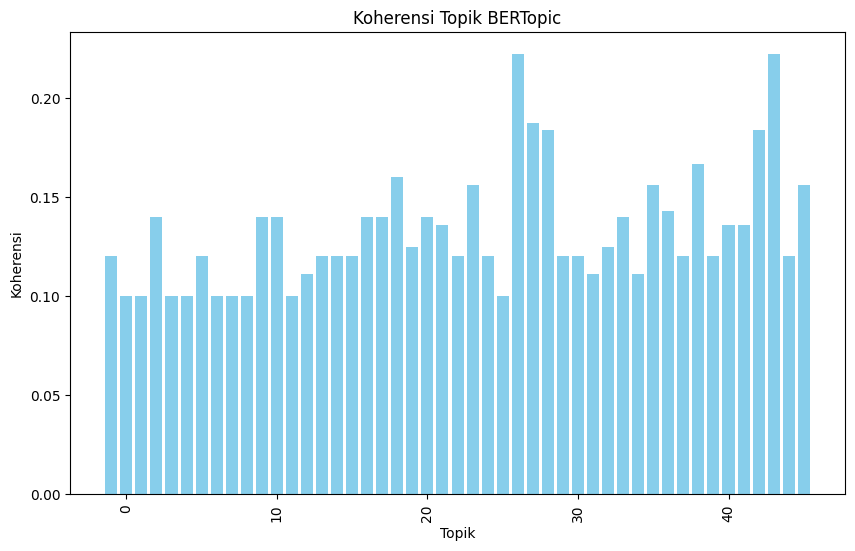

In [ ]:
# ------ Evaluasi BERTopic ------

# 1. Koherensi Topik
# Mendapatkan representasi kata-kata dalam topik
topic_words = bertopic_model.get_topics()

# Membuat matriks jarak kata
vectorizer = CountVectorizer()
vectorizer.fit([word[0] for topic in topic_words.values() for word in topic])  # Fit hanya dengan kata-kata topik
word_vectors = vectorizer.transform([word[0] for topic in topic_words.values() for word in topic])

# Menghitung koherensi topik
def calculate_topic_coherence(topic_words, word_vectors):
    topic_coherence = []
    for topic, words in topic_words.items():
        topic_words_list = [word[0] for word in words]
        word_idx = [vectorizer.vocabulary_[word] for word in topic_words_list if word in vectorizer.vocabulary_]
        topic_word_vectors = word_vectors[word_idx]
        cosine_sim = cosine_similarity(topic_word_vectors)
        coherence = np.mean(cosine_sim)  # Menghitung rata-rata cosine similarity antar kata dalam topik
        topic_coherence.append((topic, coherence))
    return topic_coherence

# Menampilkan koherensi topik
topic_coherence = calculate_topic_coherence(topic_words, word_vectors)
print("\nKoherensi Topik:")
for topic, coherence in topic_coherence:
    print(f"Topik {topic}: Koherensi = {coherence:.4f}")

# 2. Siluet (Silhouette Score)
# Mendapatkan embeddings topik untuk perhitungan silhouette score
embeddings, _ = bertopic_model.transform(data['Processed_Headline'])

# Memastikan embeddings berukuran 2D
embeddings = np.array(embeddings)  # Jika embeddings 1D, mengubahnya menjadi 2D
if embeddings.ndim == 1:
    embeddings = embeddings.reshape(-1, 1)

# Standarisasi data
scaler = StandardScaler()
scaled_embeddings = scaler.fit_transform(embeddings)

# Menghitung silhouette score
silhouette_avg = silhouette_score(scaled_embeddings, topics)
print(f"\nSiluet Score: {silhouette_avg:.4f}")

# Visualisasi Koherensi Topik
topics, coherence_scores = zip(*topic_coherence)

plt.figure(figsize=(10, 6))
plt.bar(topics, coherence_scores, color='skyblue')
plt.xlabel('Topik')
plt.ylabel('Koherensi')
plt.title('Koherensi Topik BERTopic')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Fungsi untuk mengekspor hasil ke Excel
def export_to_excel_with_topics_and_metrics(lda_model, bertopic_model, dtm, vectorizer, topics_lda, data, texts, topics, filename="exported_analysis.xlsx"):
    # Membuat workbook dan sheet
    wb = Workbook()
    ws1 = wb.active
    ws1.title = "LDA & BERTopic Topics"

    # Header
    ws1.append(["Headline", "Processed Headline", "LDA Topics", "BERTopic Topics"])

    # Iterasi melalui data
    for i, row in data.iterrows():
        # LDA Topic
        lda_topic = f"Topik {lda_model.transform(vectorizer.transform([row['Processed_Headline']])).argmax() + 1}"

        # BERTopic Topic
        bertopic_topic = topics[i] if i < len(topics) else -1  # Default -1 jika index out of range

        # Menambahkan baris ke sheet
        ws1.append([
            row['Headline'],
            row['Processed_Headline'],
            lda_topic,
            bertopic_topic
        ])

    # Simpan file Excel
    wb.save(filename)

# Contoh penggunaan
texts = data['Processed_Headline'].tolist()  # Ambil teks yang sudah diproses
export_to_excel_with_topics_and_metrics(lda, bertopic_model, dtm, vectorizer, topics_lda, data, texts, topics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1846: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

